# +++++++++++++ SIMPLE LINEAR REGRESSION +++++++++++++++++++++

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [128]:
X = data[['YearsExperience']]
y =data['Salary']

In [129]:
X

YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5

In [130]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [131]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0) 

In [122]:
X_train

YearsExperience
5               2.9
16              5.1
8               3.2
14              4.5
23              8.2
20              6.8
1               1.3
29             10.5
6               3.0
4               2.2
18              5.9
19              6.0
9               3.7
7               3.2
25              9.0
3               2.0
0               1.1
21              7.1
15              4.9
12              4.0

In [123]:
y_train

5      56642.0
16     66029.0
8      64445.0
14     61111.0
23    113812.0
20     91738.0
1      46205.0
29    121872.0
6      60150.0
4      39891.0
18     81363.0
19     93940.0
9      57189.0
7      54445.0
25    105582.0
3      43525.0
0      39343.0
21     98273.0
15     67938.0
12     56957.0
Name: Salary, dtype: float64

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
reg.predict([[1.1]])

array([37096.72893147])

In [127]:
reg.score(X_train, y_train)

0.9381900012894278

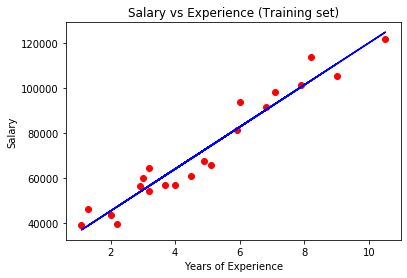

In [143]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, reg.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# +++++++++++++ MULTILPLE LINEAR REGRESSION ++++++++++++++++++

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
data = pd.read_csv(r'E:\notes\noorain_python\Python Class(09-Aug)\maati_ML\Simple and Miulti Linear Regression\50_Startups.csv')
data.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [39]:
from sklearn.preprocessing import LabelEncoder
label_State = LabelEncoder()

In [40]:
data['label_State'] = label_State.fit_transform(data['State'])

In [41]:
df = data.drop(['State'], axis = 1)

In [42]:
X = df[['R&D Spend', 'Administration','Marketing Spend','label_State']]
X.head()

R&D Spend  Administration  Marketing Spend  label_State
0  165349.20       136897.80        471784.10            2
1  162597.70       151377.59        443898.53            0
2  153441.51       101145.55        407934.54            1
3  144372.41       118671.85        383199.62            2
4  142107.34        91391.77        366168.42            1

In [43]:
y = df['Profit']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [46]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
reg.coef_

array([ 8.66942720e-01,  3.87157203e-03,  2.29447725e-02, -2.03540955e+03])

In [48]:
reg.intercept_

42112.88623356332

In [49]:
reg.predict(X_test)

array([135475.41496385, 127149.68451494,  82978.40961348, 126827.64530666,
       156455.65576626,  68360.74751304, 111661.47552371,  39433.56193689,
        60086.15067078,  93511.2940616 ,  70034.03116715,  71464.96022549,
       182854.03431611,  52793.14008882,  48483.51966151, 116281.9179429 ,
       150271.19955115])

In [50]:
reg.score(X_test, y_test)

0.891401562283552

In [51]:
reg.predict([[165349.20, 136897.80, 471784.10, 2]])

array([192745.34097546])

In [52]:
pred = reg.predict(X_test)
pred = np.array(pred)
pred

array([135475.41496385, 127149.68451494,  82978.40961348, 126827.64530666,
       156455.65576626,  68360.74751304, 111661.47552371,  39433.56193689,
        60086.15067078,  93511.2940616 ,  70034.03116715,  71464.96022549,
       182854.03431611,  52793.14008882,  48483.51966151, 116281.9179429 ,
       150271.19955115])

In [53]:
pred_data = np.array(y_test)
pred_data

array([144259.4 , 125370.37,  96479.51, 124266.9 , 149759.96,  77798.83,
       110352.25,  64926.08,  81229.06,  96778.92,  90708.19,  78239.91,
       191050.39,  69758.98,  49490.75, 126992.93, 152211.77])

# +++++++++++++++ Polynomial Regression ++++++++++++++++++++++++++

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r'E:\notes\noorain_python\Python Class(09-Aug)\maati_ML\Polynomial Regression\Python\Position_Salaries.csv')
data.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [8]:
X = data[['Level']]
y = data['Salary']

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
reg.score(X,y)

0.0897542329232518

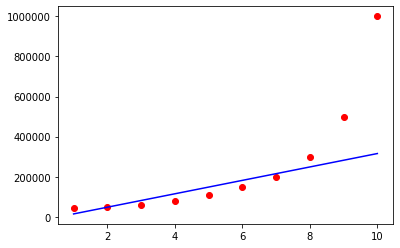

In [28]:
plt.scatter(X,y, color = 'red')
plt.plot(X, reg.predict(X), color = 'blue')

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
poly_reg = PolynomialFeatures(degree = 4)
pol_X = poly_reg.fit_transform(X)
reg_2 = LinearRegression()
reg_2.fit(pol_X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
reg_2.score(pol_X, y)

0.9973922891706611

In [44]:
print(reg_2.predict(pol_X))
np.array(y)

[ 53356.64335676  31759.90675985  58642.19114211  94632.86713283
 121724.94172496 143275.0582751  184003.49650352 289994.17249416
 528694.63869461 988916.0839161 ]


array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [48]:
print(reg.predict([[6.5]]))
print(reg_2.predict(poly_reg.fit_transform([[6.5]])))

[198792.37288136]
[158862.45265155]


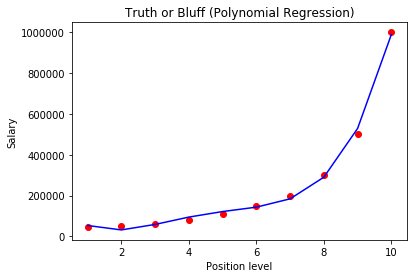

In [49]:
plt.scatter(X, y, color = 'red')
plt.plot(X, reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# ++++++++++++++++ Logistic Regression ++++++++++++++++++++++++

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [76]:
data = pd.read_csv(r'E:\notes\Machine Learning\py-master\ML\7_logistic_reg\insurance_data.csv')
data.head()

age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1

In [77]:
X = data[['age']]

In [78]:
y = data[['bought_insurance']]

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [80]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [81]:
log_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
pred = log_reg.predict(X_test)
print(pred)
print(np.array(y_test).T)

[1 1 1 1 1 0 1 0 0]
[[1 1 1 1 1 0 1 0 0]]


In [83]:
log_reg.score(X_test,y_test)

1.0

In [84]:
log_reg.predict_proba(X_test)

array([[0.36795916, 0.63204084],
       [0.3003633 , 0.6996367 ],
       [0.32212141, 0.67787859],
       [0.16005769, 0.83994231],
       [0.18927295, 0.81072705],
       [0.80028318, 0.19971682],
       [0.41631374, 0.58368626],
       [0.78356036, 0.21643964],
       [0.91708265, 0.08291735]])

In [85]:
log_reg.coef_

array([[0.1015288]])

In [86]:
log_reg.intercept_

array([-4.23087166])

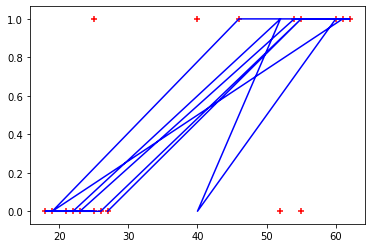

In [88]:
plt.scatter(X_train, y_train, color = 'red', marker= '+')
plt.plot(X_train, log_reg.predict(X_train), color = 'blue')

# ++++++++ Logistic Regression: Multiclass Classification ++++++++++++

In [90]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()
import numpy as np

<Figure size 432x288 with 0 Axes>

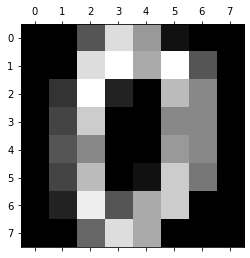

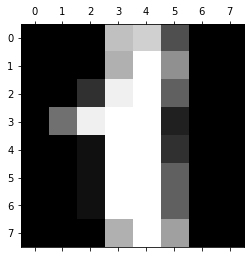

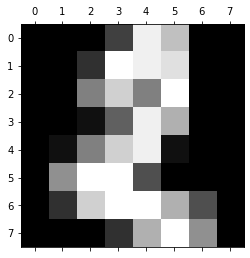

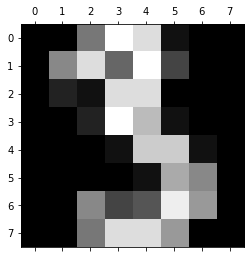

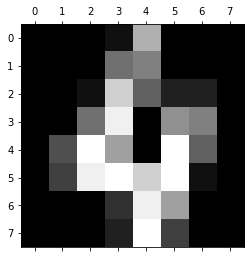

In [91]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [92]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [93]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [97]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
model.score(X_test, y_test)

0.9638888888888889

In [99]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [100]:
y_predicted = model.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 36,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  1, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 33,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 30]], dtype=int64)

Text(69.0, 0.5, 'Truth')

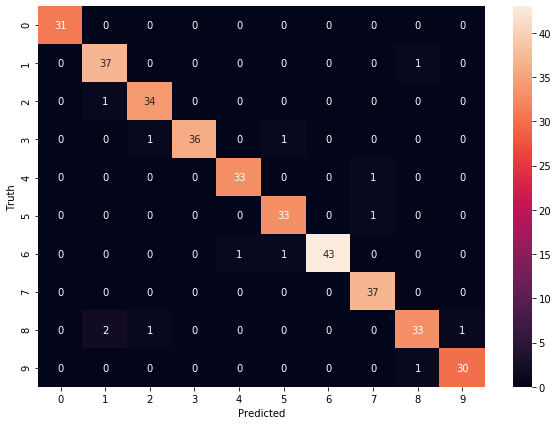

In [102]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# +++++++++++++++++++++ Desicion Tree +++++++++++++++++++++++++++

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [105]:
data = pd.read_csv(r'E:\notes\noorain_python\Python Class(09-Aug)\maati_ML\Decision Tree Regression\Python\Position_Salaries.csv')
data.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [110]:
X = data[['Level']]
y = data['Salary']

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [112]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [114]:
tree.fit(X_test, y_test)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [115]:
tree.score(X_test, y_test)

1.0

In [117]:
print(tree.predict(X_test))
print(np.array(y_test))

[  60000.  500000.  110000. 1000000.]
[  60000  500000  110000 1000000]


# ++++++++++++ Decision Tree Classifier ++++++++++++++++

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [162]:
df = pd.read_csv(r'E:\notes\Machine Learning\py-master\ML\9_decision_tree\salaries.csv')
df.head()

company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0

In [163]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [164]:
df['LB_company'] = LE.fit_transform(df['company'])
df['LB_job'] = LE.fit_transform(df['job'])
df['LB_degree'] = LE.fit_transform(df['degree'])

In [165]:
df.head()

company                  job     degree  salary_more_then_100k  LB_company  \
0  google      sales executive  bachelors                      0           2   
1  google      sales executive    masters                      0           2   
2  google     business manager  bachelors                      1           2   
3  google     business manager    masters                      1           2   
4  google  computer programmer  bachelors                      0           2   

   LB_job  LB_degree  
0       2          0  
1       2          1  
2       0          0  
3       0          1  
4       1          0

In [166]:
df1 = df.drop(['company', 'job', 'degree'], axis=1)
df1.head()

salary_more_then_100k  LB_company  LB_job  LB_degree
0                      0           2       2          0
1                      0           2       2          1
2                      1           2       0          0
3                      1           2       0          1
4                      0           2       1          0

In [167]:
X = df1[['LB_company','LB_job','LB_degree']]
y = df1['salary_more_then_100k']

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [169]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [170]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [171]:
print(tree.predict(X_test))
print(np.array(y_test))

[0 0 0 0 1 1]
[0 0 0 1 1 0]


In [172]:
tree.score(X_test,y_test)

0.6666666666666666

# +++++++++++ support_vector_regression +++++++++++++++++

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [221]:
data = pd.read_csv(r'E:\notes\noorain_python\Python Class(09-Aug)\maati_ML\Decision Tree Regression\Python\Position_Salaries.csv')
data.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [222]:
X = data[['Level']].values
y = data[['Salary']].values

In [223]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [224]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [225]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [227]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')

In [228]:
svr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [232]:
sc_y.inverse_transform(svr.predict(sc_X.transform([[6.5]])))

array([199749.84806513])

In [233]:
svr.score(sc_X.fit_transform(X_test), sc_X.fit_transform(y_test))

0.41902380644352477

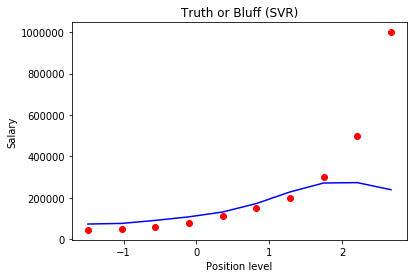

In [235]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# ++++++++++++ Support Vector Machine Classifier +++++++++++++++++

In [236]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [237]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [238]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [239]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [240]:
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [241]:
df[df.target==1].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target  
50       1  
51       1  
52       1  
53       1  
54       1

In [242]:
df[df.target==2].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target  
100       2  
101       2  
102       2  
103       2  
104       2

In [243]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [244]:
df[45:55]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
45                4.8               3.0                1.4               0.3   
46                5.1               3.8                1.6               0.2   
47                4.6               3.2                1.4               0.2   
48                5.3               3.7                1.5               0.2   
49                5.0               3.3                1.4               0.2   
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target flower_name  
45       0      setosa  
46       0      setosa  
47       0      setosa  
48       0      setosa  
49       0      setosa  
50       1  versicolor  
51       1  versicolor  
52       1  versicolor  
53       1  versicolor  
54       1  versicolor

In [245]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [246]:
import matplotlib.pyplot as plt
%matplotlib inline

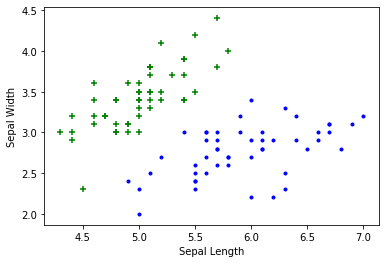

In [247]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

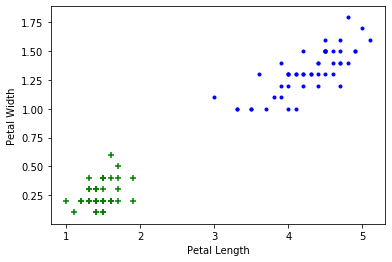

In [248]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [252]:
len(X_train)

120

In [253]:
len(X_test)

30

In [258]:
from sklearn.svm import SVC
model = SVC()

In [259]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [260]:
model.score(X_test, y_test)

0.9

In [261]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [262]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9

In [263]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [264]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

In [265]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [266]:
model_linear_kernal.score(X_test, y_test)

0.9666666666666667

# ++++++++++++++ Random Forest Regressor +++++++++++++++++++

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r'E:\notes\noorain_python\Python Class(09-Aug)\maati_ML\Decision Tree Regression\Python\Position_Salaries.csv')
data.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [3]:
X = data[['Level']]
y = data['Salary']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [8]:
from sklearn.ensemble import RandomForestRegressor
ran_forest = RandomForestRegressor(n_estimators=10, random_state= 0)
ran_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [9]:
ran_forest.score(X_test, y_test)

-0.06505695061348349

In [10]:
ran_forest.predict([[1]])

array([49000.])

In [13]:
print(ran_forest.predict(X_test))
print(np.array(y_test))

[ 58500. 260000.  94000. 260000.]
[  60000  500000  110000 1000000]


# ++++++++++++++ Random Forest Classifier +++++++++++++++++++

In [14]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [15]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

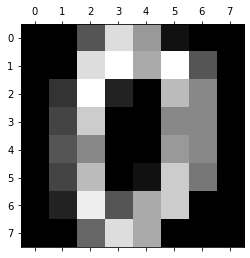

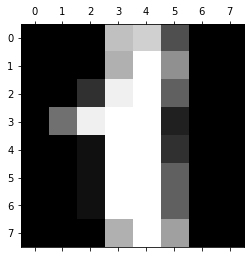

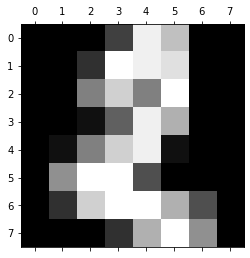

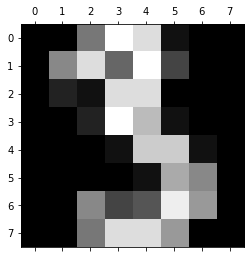

In [18]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i])

In [19]:
df = pd.DataFrame(digits.data)
df.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [20]:
df['target'] = digits.target

In [21]:
df[0:12]

0    1     2     3     4     5     6    7    8    9  ...   55   56   57  \
0   0.0  0.0   5.0  13.0   9.0   1.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1   0.0  0.0   0.0  12.0  13.0   5.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2   0.0  0.0   0.0   4.0  15.0  12.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3   0.0  0.0   7.0  15.0  13.0   1.0   0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4   0.0  0.0   0.0   1.0  11.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5   0.0  0.0  12.0  10.0   0.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
6   0.0  0.0   0.0  12.0  13.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7   0.0  0.0   7.0   8.0  13.0  16.0  15.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
8   0.0  0.0   9.0  14.0   8.0   1.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9   0.0  0.0  11.0  12.0   0.0   0.0   0.0  0.0  0.0  2.0  ...  0.0  0.0  0.0   
10  0.0  0.0   1.0   9.0  15.0  11.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
11  0.0  0.0   0.0   0.0  14.0  13.0   1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      58    59    60    61   62   63  target  
0    6.0  13.0  10.0   0.0  0.0  0.0       0  
1    0.0  11.0  16.0  10.0  0.0  0.0       1  
2    0.0   3.0  11.0  16.0  9.0  0.0       2  
3    7.0  13.0  13.0   9.0  0.0  0.0       3  
4    0.0   2.0  16.0   4.0  0.0  0.0       4  
5    9.0  16.0  16.0  10.0  0.0  0.0       5  
6    1.0   9.0  15.0  11.0  3.0  0.0       6  
7   13.0   5.0   0.0   0.0  0.0  0.0       7  
8   11.0  16.0  15.0  11.0  1.0  0.0       8  
9    9.0  12.0  13.0   3.0  0.0  0.0       9  
10   1.0  10.0  13.0   3.0  0.0  0.0       0  
11   0.0   1.0  13.0  16.0  1.0  0.0       1  

[12 rows x 65 columns]

In [22]:
X = df.drop('target',axis='columns')
y = df.target

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
model.score(X_test, y_test)

0.9527777777777777

In [26]:
y_predicted = model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 42,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 27,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 30,  1,  0],
       [ 0,  3,  0,  0,  0,  0,  1,  1, 31,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  0, 36]], dtype=int64)

Text(69.0, 0.5, 'Truth')

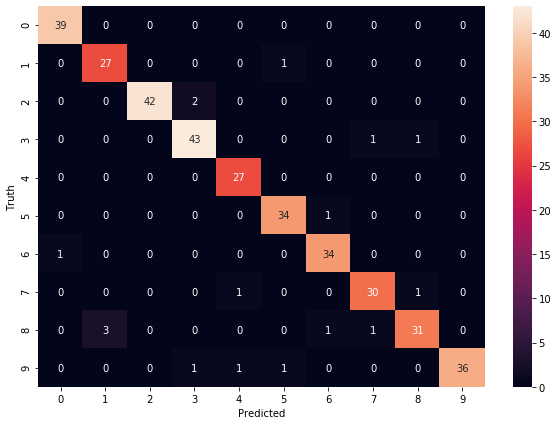

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# +++++++++++ KFold Cross Validation Python Tutorial +++++++++

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

Logistic Regression

In [31]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9555555555555556

SVM

In [32]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.5

Random Forest

In [33]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9722222222222222

KFold cross validation

In [34]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [35]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [36]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [37]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [38]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [39]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [40]:
scores_rf

[0.9432387312186978, 0.9482470784641068, 0.9449081803005008]

cross_val_score function

In [41]:
from sklearn.model_selection import cross_val_score

Logistic regression model performance using cross_val_score

In [42]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

svm model performance using cross_val_score

In [43]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

random forest performance using cross_val_score

In [44]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.94156928, 0.94991653, 0.92654424])

Parameter tunning using k fold cross validation

In [45]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8664494103041589

In [46]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.934885164494103

In [47]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9398851644941029

In [48]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9432371198013655

# +++++++++ Clustering With K Means +++++++++

In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
data = pd.read_csv(r'E:\notes\Machine Learning\py-master\ML\13_kmeans\income.csv')
data.head()

Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000

In [84]:
X = data[['Age']]
y = data['Income($)']

Text(0, 0.5, 'Income($)')

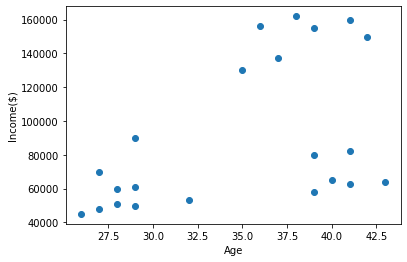

In [85]:
plt.scatter(data.Age,data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [88]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [89]:
km = KMeans(n_clusters=4)

In [90]:
km.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [94]:
km.predict(X_test)

array([0, 3, 1, 1, 1, 3, 1, 3])

In [93]:
km.score(X_test, y_test)

-9.160000000000082